In [1]:
!pip install pingouin

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pingouin as pg
from IPython.display import display, HTML

IMPORT DATA

In [9]:
# Load the data with the specific file path and sheet name
file_path = "Behavioural-review.xlsx"
sheet_name1 = "NW"

sheet_name2 = "RT"

sheet_name3 = "NW_RT"

# Load the data
df1 = pd.read_excel(file_path, sheet_name=sheet_name1)

df2 = pd.read_excel(file_path, sheet_name=sheet_name2)

df = pd.read_excel(file_path, sheet_name=sheet_name3)


# Display the first few rows
print("NW Data Preview:")
display(df1.head())

print("RT Data Preview:")
display(df2.head())

print("NW_RT Data Preview:")
display(df3.head())


NW Data Preview:


,E_C,E_D,I_C,I_D
0,3,4.0,3.0,12.0
1,3,4.0,3.0,4.0
2,3,15.0,3.0,6.0
3,3,2.0,2.0,14.0
4,3,4.0,2.0,6.0


RT Data Preview:


,E_C,E_D,I_C,I_D
0,1.4,30.0,1.8,14.2
1,2.1,7.6,1.2,16.4
2,3.8,25.2,5.0,29.7
3,1.6,6.1,13.1,13.2
4,2.1,19.3,1.0,17.0


NW_RT Data Preview:


,NW_E_C,NW_E_D,NW_I_C,NW_I_D,RT_E_C,RT_E_D,RT_I_C,RT_I_D
0,3,4.0,3.0,12.0,1.4,30.0,1.8,14.2
1,3,4.0,3.0,4.0,2.1,7.6,1.2,16.4
2,3,15.0,3.0,6.0,3.8,25.2,5.0,29.7
3,3,2.0,2.0,14.0,1.6,6.1,13.1,13.2
4,3,4.0,2.0,6.0,2.1,19.3,1.0,17.0


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_excel('Dataset_alpha.xlsx', sheet_name='NW_RT')
# Rest of your code remains the same
# Reshape data: Melt wide format to long format
df_long = df.melt(var_name="Measure_Background_Condition", value_name="Value")

# Extract Measure (NW or RT), Background (E or I), and Condition (C or D)
df_long[['Measure', 'Background', 'Condition']] = df_long['Measure_Background_Condition'].str.extract(r'^(NW|RT)_(E|I)_(C|D)$')

# Drop the original column with combined names
df_long = df_long.drop(columns=["Measure_Background_Condition"])

# Ensure extracted columns are correctly mapped
df_long['Measure'] = df_long['Measure'].map({'NW': 'Number of Words', 'RT': 'Response Time'})
df_long['Background'] = df_long['Background'].map({'E': 'EDs', 'I': 'IDEs'})
df_long['Condition'] = df_long['Condition'].map({'C': 'Convergent', 'D': 'Divergent'})

# Pivot table to separate NW and RT into columns
df_pivot = df_long.pivot(index=df_long.index, columns="Measure", values="Value").reset_index()

# Merge Condition and Background back
df_pivot["Condition"] = df_long["Condition"]
df_pivot["Background"] = df_long["Background"]

# Define color palette for Condition & Background combinations
palette = {
    ("Convergent", "EDs"): "lightblue",
    ("Convergent", "IDEs"): "blue",
    ("Divergent", "EDs"): "lightcoral",
    ("Divergent", "IDEs"): "red"
}

# Create scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_pivot,
    x="Number of Words",
    y="Response Time",
    hue=df_pivot[["Condition", "Background"]].apply(tuple, axis=1),
    palette=palette,
    style="Condition",
    s=100
)

# Titles and labels
plt.title("Clustered Scatter Plot: Number of Words vs Response Time", fontsize=14)
plt.xlabel("Number of Words (NW)")
plt.ylabel("Response Time (RT)")
plt.legend(title="Condition & Background")

# Save and display plot
plt.savefig("Clustered_Scatter_NW_RT.png", dpi=300)
plt.show()

KeyError: 0

In [13]:
# Reshape the data: Convert wide format to long format

#df1 for NW and df2 for RT 
df = df1

# Reshape data to long format
df_long = df.melt(var_name="Factor_Combination", value_name="Value")

# Extract factor levels from column names
df_long[['Background', 'Condition']] = df_long['Factor_Combination'].str.split('_', expand=True)

# Map categorical labels
df_long['Condition'] = df_long['Condition'].map({'C': 'Convergent', 'D': 'Divergent'})
df_long['Background'] = df_long['Background'].map({'E': 'EDs', 'I': 'IDEs'})

# Drop the original column name field
df_long.drop(columns=['Factor_Combination'], inplace=True)

# Display transformed data
print(df_long.head())

   Value Background   Condition
0    3.0        EDs  Convergent
1    3.0        EDs  Convergent
2    3.0        EDs  Convergent
3    3.0        EDs  Convergent
4    3.0        EDs  Convergent


In [15]:
# Re-run the ANOVA test
anova_results = pg.anova(
    dv="Value", 
    between=["Condition", "Background"], 
    data=df_long, 
    detailed=True
)

print(anova_results)

                   Source            SS      DF           MS           F  \
0               Condition   2902.466699     1.0  2902.466699  282.586578   
1              Background    228.629854     1.0   228.629854   22.259593   
2  Condition * Background    225.931668     1.0   225.931668   21.996896   
3                Residual  15396.334873  1499.0    10.271071         NaN   

          p-unc       np2  
0  3.131852e-58  0.158615  
1  2.603543e-06  0.014632  
2  2.979385e-06  0.014462  
3           NaN       NaN  


In [10]:
anova_results['Effect Size (η²)'] = anova_results['SS'] / anova_results['SS'].sum()
display(anova_results)

,Source,SS,DF,MS,F,p-unc,np2,Effect Size (η²)
0,Condition,2902.466699,1.0,2902.466699,282.586578,3.131852e-58,0.158615,0.154770
1,Background,228.629854,1.0,228.629854,22.259593,2.603543e-06,0.014632,0.012191
2,Condition * Background,225.931668,1.0,225.931668,21.996896,2.979385e-06,0.014462,0.012048
3,Residual,15396.334873,1499.0,10.271071,NaN,NaN,NaN,0.820991


In [11]:
import pingouin as pg

# List of factors
factors = ['Condition', 'Background']

# Run Tukey post-hoc test for each factor
posthoc_results = {}
for factor in factors:
    posthoc = pg.pairwise_tukey(
        data=df_long, 
        dv="Value", 
        between=[factor]
    )
    posthoc_results[factor] = posthoc
    display(posthoc)


,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,Convergent,Divergent,3.52611,6.303935,-2.777825,0.167675,-16.566737,0.0,-0.85438


,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,EDs,IDEs,4.583153,5.377816,-0.794663,0.186325,-4.264923,0.000021,-0.226089


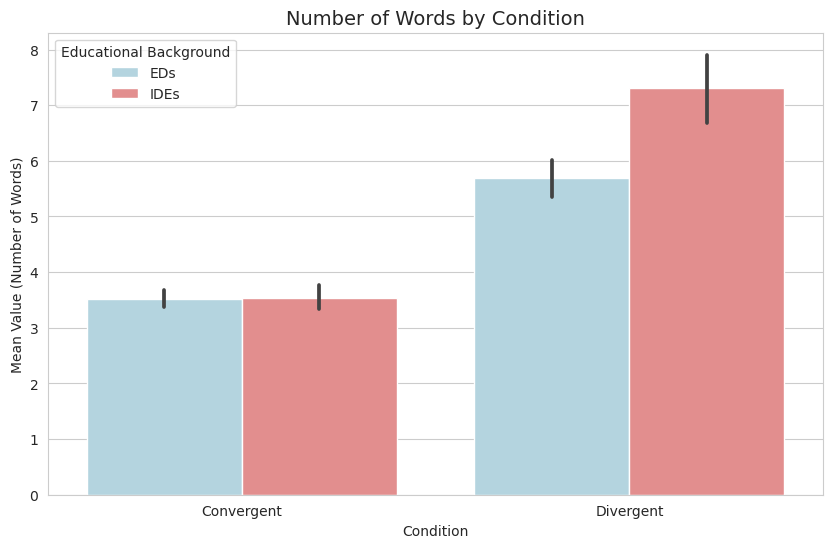

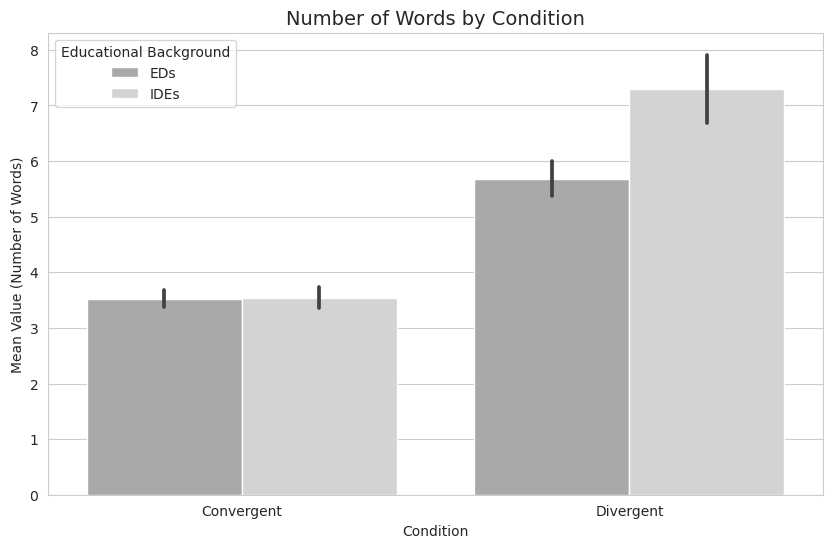

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set_style("whitegrid")

# Define soft pastel colors for Education backgrounds
education_colors = {"EDs": "lightblue", "IDEs": "lightcoral"}
greyscale_colors = {"EDs": "darkgray", "IDEs": "lightgray"}

# Function to create and save the plot
def plot_and_save(palette, filename):
    plt.figure(figsize=(10, 6))

    sns.barplot(
        data=df_long,
        x="Condition",
        y="Value",
        hue="Background",
        palette=palette,
        dodge=True,  # Ensures bars are side-by-side
    )

    # Titles and labels
    plt.title("Number of Words by Condition", fontsize=14)
    plt.xlabel("Condition")
    plt.ylabel("Mean Value (Number of Words)")
    plt.legend(title="Educational Background")

    # Save and display the plot
    plt.savefig(filename, dpi=300)
    plt.show()

# Generate and save both plots
plot_and_save(education_colors, "NW_by_Condition_colored.png")
plot_and_save(greyscale_colors, "NW_TRPs_by_Condition_greyscale.png")

In [16]:
#df1 for NW and df2 for RT 
df = df2

# Reshape data to long format
df_long = df.melt(var_name="Factor_Combination", value_name="Value")

# Extract factor levels from column names
df_long[['Background', 'Condition']] = df_long['Factor_Combination'].str.split('_', expand=True)

# Map categorical labels
df_long['Condition'] = df_long['Condition'].map({'C': 'Convergent', 'D': 'Divergent'})
df_long['Background'] = df_long['Background'].map({'E': 'EDs', 'I': 'IDEs'})

# Drop the original column name field
df_long.drop(columns=['Factor_Combination'], inplace=True)

# Display transformed data
print(df_long.head())

   Value Background   Condition
0    1.4        EDs  Convergent
1    2.1        EDs  Convergent
2    3.8        EDs  Convergent
3    1.6        EDs  Convergent
4    2.1        EDs  Convergent


In [18]:
# Re-run the ANOVA test
anova_results = pg.anova(
    dv="Value", 
    between=["Condition", "Background"], 
    data=df_long, 
    detailed=True
)

print(anova_results)

                   Source            SS      DF            MS            F  \
0               Condition  55941.963136     1.0  55941.963136  1385.118185   
1              Background     48.007657     1.0     48.007657     1.188665   
2  Condition * Background    765.032391     1.0    765.032391    18.942136   
3                Residual  58441.237380  1447.0     40.387863          NaN   

           p-unc       np2  
0  2.971903e-213  0.489075  
1   2.757804e-01  0.000821  
2   1.442014e-05  0.012921  
3            NaN       NaN  


In [19]:
anova_results['Effect Size (η²)'] = anova_results['SS'] / anova_results['SS'].sum()
display(anova_results)

,Source,SS,DF,MS,F,p-unc,np2,Effect Size (η²)
0,Condition,55941.963136,1.0,55941.963136,1385.118185,2.971903e-213,0.489075,0.485623
1,Background,48.007657,1.0,48.007657,1.188665,2.757804e-01,0.000821,0.000417
2,Condition * Background,765.032391,1.0,765.032391,18.942136,1.442014e-05,0.012921,0.006641
3,Residual,58441.237380,1447.0,40.387863,NaN,NaN,NaN,0.507319


In [21]:
import pingouin as pg

# List of factors
factors = ['Condition', 'Background']

# Run Tukey post-hoc test for each factor
posthoc_results = {}
for factor in factors:
    posthoc = pg.pairwise_tukey(
        data=df_long, 
        dv="Value", 
        between=[factor]
    )
    posthoc_results[factor] = posthoc
    display(posthoc)

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,Convergent,Divergent,3.8684,16.297718,-12.429318,0.335946,-36.997941,0.0,-1.94266


,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,EDs,IDEs,9.679291,10.166898,-0.487607,0.478172,-1.019731,0.308026,-0.05467


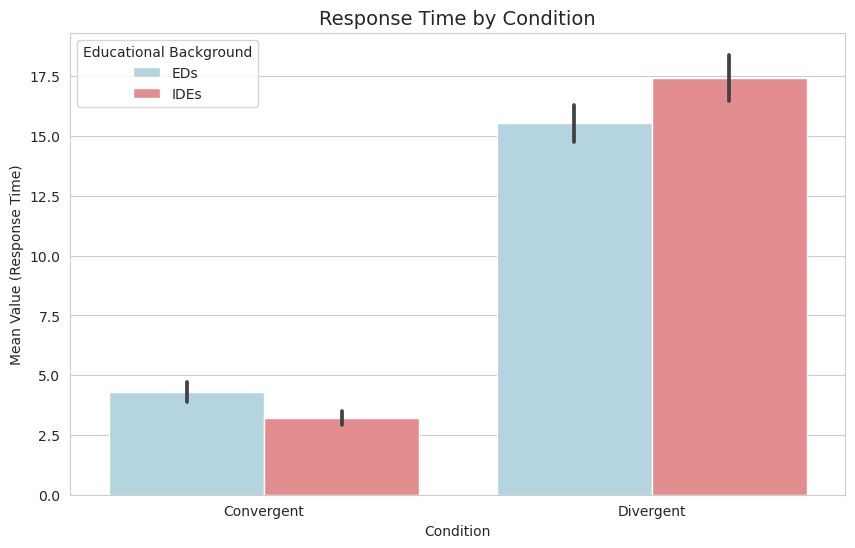

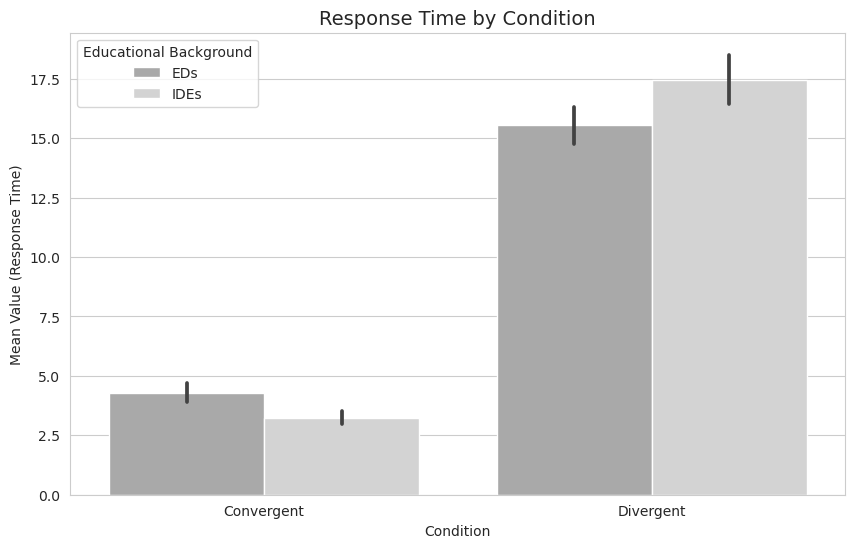

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set_style("whitegrid")

# Define soft pastel colors for Education backgrounds
education_colors = {"EDs": "lightblue", "IDEs": "lightcoral"}
greyscale_colors = {"EDs": "darkgray", "IDEs": "lightgray"}

# Function to create and save the plot
def plot_and_save(palette, filename):
    plt.figure(figsize=(10, 6))

    sns.barplot(
        data=df_long,
        x="Condition",
        y="Value",
        hue="Background",
        palette=palette,
        dodge=True,  # Ensures bars are side-by-side
    )

    # Titles and labels
    plt.title("Response Time by Condition", fontsize=14)
    plt.xlabel("Condition")
    plt.ylabel("Mean Value (Response Time)")
    plt.legend(title="Educational Background")

    # Save and display the plot
    plt.savefig(filename, dpi=300)
    plt.show()

# Generate and save both plots
plot_and_save(education_colors, "RT_by_Condition_colored.png")
plot_and_save(greyscale_colors, "RT_by_Condition_greyscale.png")